# 4. Model Evaluation

This notebook evaluates the performance of our trained models on the test set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

%matplotlib inline


## 4.1 Load Models and Test Data

In [2]:
# Load models
models = {
    'Linear Regression': joblib.load('./models/linear_model.joblib'),
    'Ridge Regression': joblib.load('./models/ridge_model.joblib'),
    'Decision Tree': joblib.load('./models/decision_tree_model.joblib'),
    'Random Forest': joblib.load('./models/random_forest_model.joblib')
}

# Load test data
df = pd.read_csv('../data/TSLA_processed.csv')
X_test = df.drop('Close', axis=1)
y_test = df['Close']

## 4.2 Evaluation Metrics

In [3]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    return {
        'R2': r2_score(y_test, predictions),
        'RMSE': np.sqrt(mean_squared_error(y_test, predictions)),
        'MAE': mean_absolute_error(y_test, predictions),
        'predictions': predictions
    }

# Evaluate all models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_test, y_test)

# Create performance comparison dataframe
performance_df = pd.DataFrame({
    name: {
        'R² Score': metrics['R2'],
        'RMSE': metrics['RMSE'],
        'MAE': metrics['MAE']
    } for name, metrics in results.items()
}).round(4)

print("Model Performance Comparison:")
display(performance_df)
performance_df.to_csv('./results/model_performance.csv')
print("\nResults have been saved to 'model_performance.csv'")

Model Performance Comparison:


,Linear Regression,Ridge Regression,Decision Tree,Random Forest
R² Score,0.9998,0.9997,0.9997,0.9997
RMSE,1.7528,2.1435,2.1100,1.9694
MAE,1.2405,1.5011,0.8298,0.9959



Results have been saved to 'model_performance.csv'


## 4.3 Visualization of Predictions

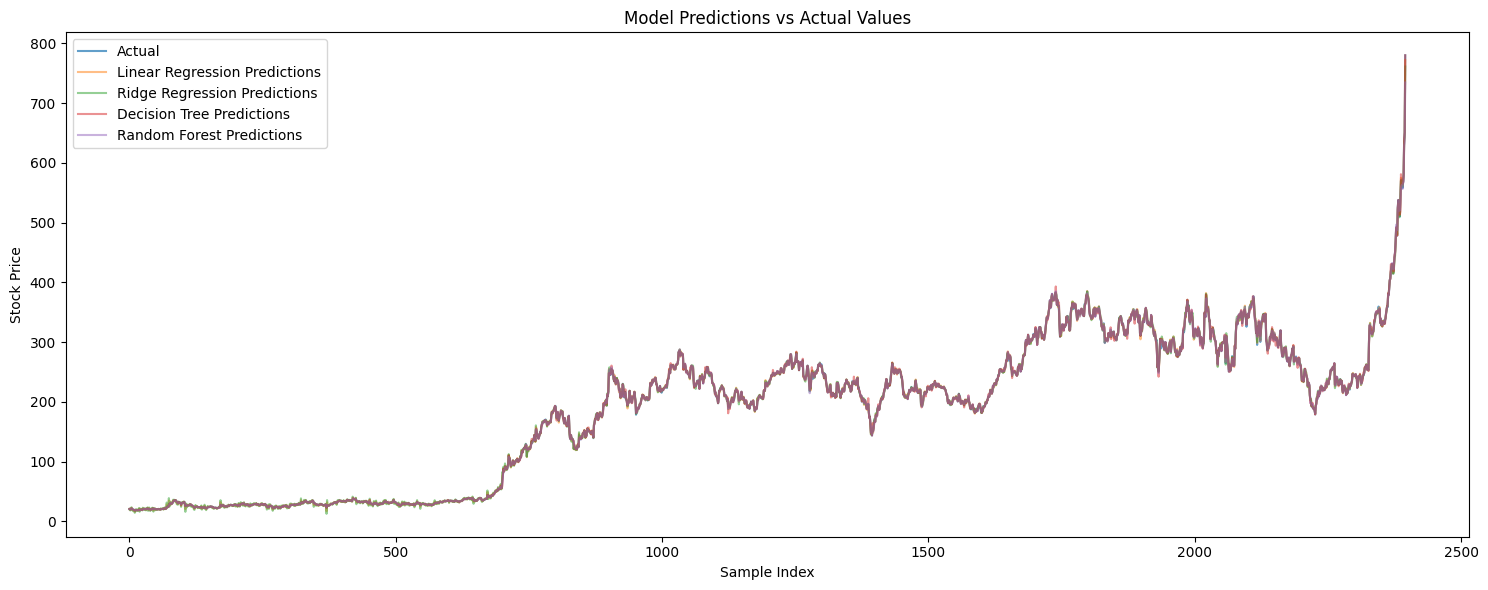

In [4]:
def plot_predictions(y_true, predictions_dict, title):
    plt.figure(figsize=(15, 6))
    plt.plot(range(len(y_true)), y_true.values, label='Actual', alpha=0.7)
    
    for name, metrics in predictions_dict.items():
        plt.plot(range(len(y_true)), metrics['predictions'], 
                label=f'{name} Predictions', alpha=0.5)
    
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_predictions(y_test, results, 'Model Predictions vs Actual Values')

## 4.4 Error Analysis

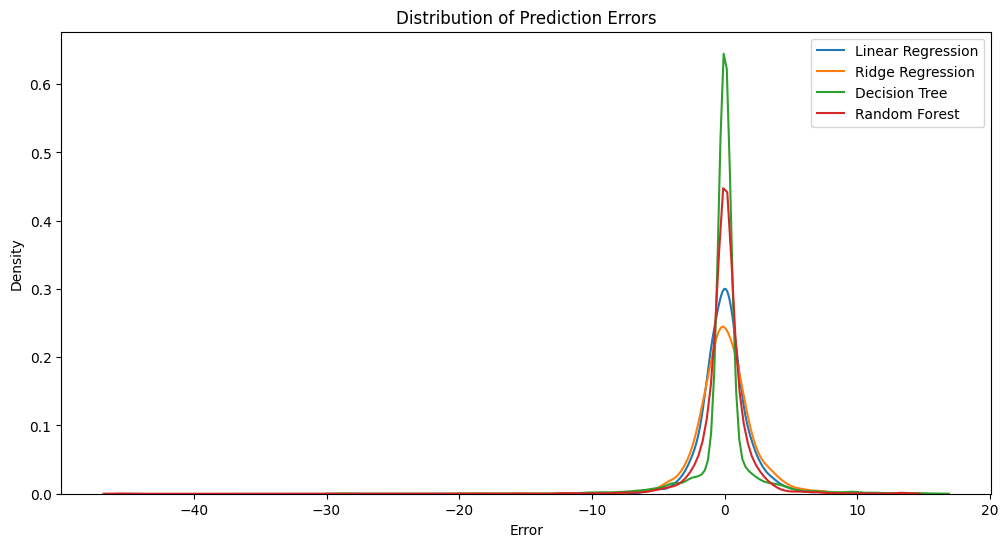

In [5]:
# Calculate prediction errors
errors_df = pd.DataFrame()
for name, metrics in results.items():
    errors_df[name] = metrics['predictions'] - y_test.values

# Plot error distributions
plt.figure(figsize=(12, 6))
for column in errors_df.columns:
    sns.kdeplot(data=errors_df[column], label=column)

plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()
plt.show()

## 4.5 Feature Importance Analysis

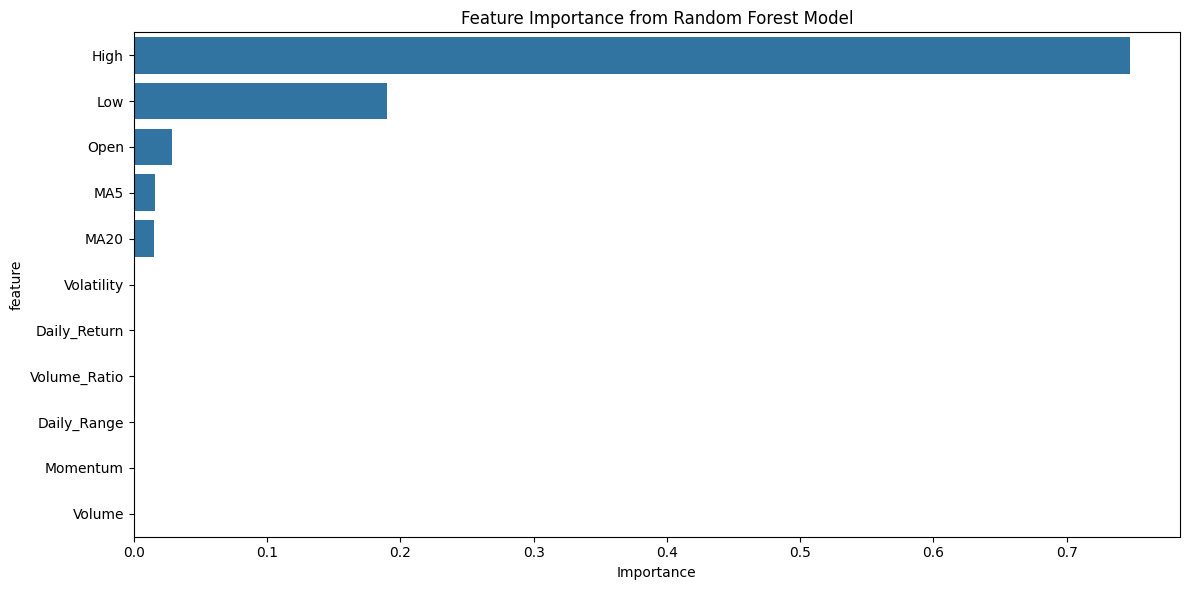

In [6]:
# Get feature importance from Random Forest model
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X_test.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()